In [26]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import pandas as pd
from imblearn.combine import SMOTETomek
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import balanced_accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_excel('adjusted_dataset.xlsx')
obesity_data = df.sample(frac=1, random_state=42).reset_index(drop=True)
X = obesity_data[['Sex', 'Age', 'Height', 'Overweight_Obese_Family', 'Consumption_of_Fast_Food', 'Frequency_of_Consuming_Vegetables', 'Number_of_Main_Meals_Daily', 'Food_Intake_Between_Meals', 'Smoking', 'Liquid_Intake_Daily', 'Calculation_of_Calorie_Intake', 'Physical_Excercise', 'Schedule_Dedicated_to_Technology', 'Type_of_Transportation_Used']]
y = obesity_data['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
#Without smote, the accuracy was around 81%, with resampled - 79%
#smote_tomek = SMOTETomek(random_state=42)
#X_resampled, y_resampled = smote_tomek.fit_resample(X_train, y_train)

In [22]:
param_grid = {
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}
clf = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=0)
grid_search.fit(X_train, y_train)

y_pred = grid_search.predict(X_test)


print("Best parameters:", grid_search.best_params_)
best_dt = grid_search.best_estimator_

accuracy = accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))
print(f"Accuracy of the decision tree model: {accuracy}")
balanced_acc = balanced_accuracy_score(y_test, y_pred)
print("Balanced Accuracy:", balanced_acc)

Best parameters: {'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
              precision    recall  f1-score   support

           1       0.70      0.70      0.70        10
           2       0.83      0.86      0.85       125
           3       0.84      0.76      0.80       130
           4       0.72      0.81      0.76        57

    accuracy                           0.81       322
   macro avg       0.77      0.78      0.78       322
weighted avg       0.81      0.81      0.81       322

Accuracy of the decision tree model: 0.8074534161490683
Balanced Accuracy: 0.7831390013495276


In [23]:
feature_scores = pd.Series(best_dt.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_scores

Age                                  0.315909
Height                               0.116743
Physical_Excercise                   0.099307
Number_of_Main_Meals_Daily           0.098833
Frequency_of_Consuming_Vegetables    0.071311
Sex                                  0.050197
Smoking                              0.048448
Type_of_Transportation_Used          0.046320
Food_Intake_Between_Meals            0.037749
Liquid_Intake_Daily                  0.034617
Schedule_Dedicated_to_Technology     0.028630
Overweight_Obese_Family              0.025752
Calculation_of_Calorie_Intake        0.013886
Consumption_of_Fast_Food             0.012298
dtype: float64

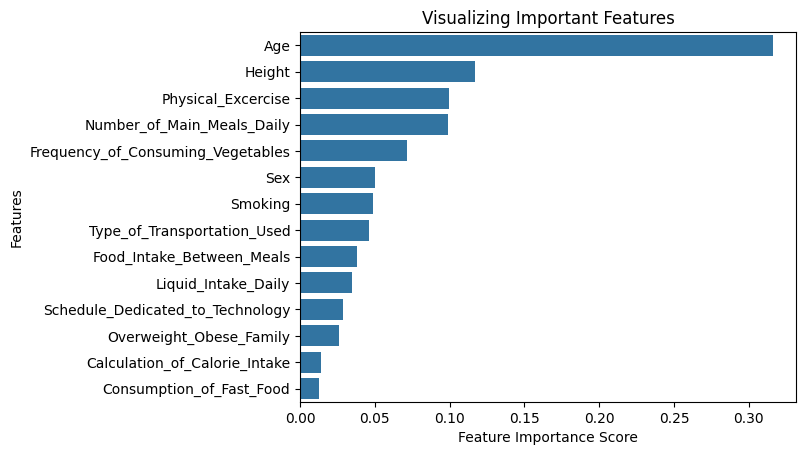

In [27]:
sns.barplot(x=feature_scores, y=feature_scores.index)

plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()